# Regression Analysis?

각 현상들의 상관관계를 추측하는 것 ([estimating the relationships among variables](https://en.wikipedia.org/wiki/Regression_analysis))

# Linear Regression

이런 저런 선형적 상관 관계에 있는 사회적 현상들..

- 많이 먹으면, 살이 찐다. (하루 섭취 열량, 몸무게)
- 일을 많이 하면, 돈을 많이 번다. (하루 일하는 시간, 연봉)
- 코드가 길어질 수록, 버그가 많아진다. (하루에 작성한 코드 길이, 발생한 버그 개수)

버그가 많아지는 현상의 원인을 하나로만 바라보면, 그것이 바로 Univariate linear regression의 길

# Cost function

선은 선인데 어느 정도의 기울기와 절편을 갖는 선인지 찾을때 사용하는 함수. 누가 누가 데이터를 가장 잘 표현할 수 있는 선인가. 

# Gradient Descent Algorithm

최소의 Cost function 값을 찾는 알고리즘

# Simple Linear Regression with pure python code

### sample data 만들기

In [1]:
import numpy as np
from pandas import DataFrame, Series
import matplotlib
%matplotlib inline

In [2]:
import math
import random

In [3]:
# how_many 만큼 start, end 범위에 있는 숫자들을 중복하여 추출합니다.
def get_random_numbers(start, end, how_many):
    return [random.randint(start, end) for i in range(how_many)]

In [4]:
# 일단 완전 랜덤하게 뽑아보자
x=get_random_numbers(0,24,10)
y=get_random_numbers(10,100,10)

In [5]:
data = {
    'x': x,
    'y': y
}
df = DataFrame(data)

/Library/Python/2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


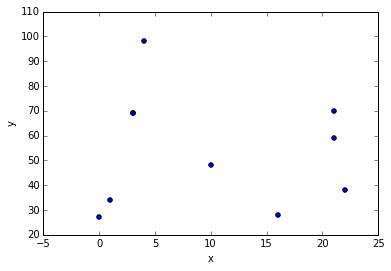

In [6]:
df.plot(kind='scatter', x='x', y='y')

### Linear regression model

In [7]:
# line을 찾는 것이 우리의 목적. input은 데이터, output은 line
def simple_fit(X, Y):
    print X, Y
    # initial values
    a = -1
    b = 1
    alpha = 0.00001
    
    def run_gradient_descent(a,b):
        sum_for_a = 0
        sum_for_b = 0
        
        # update simultaneously
        for x,y in zip(X,Y):
            sum_for_a += ((a*x+b)-y)*x
            sum_for_b += ((a*x+b)-y)
                        
        a = a - alpha*sum_for_a/len(X)
        b = b - alpha*sum_for_b/len(X)
        
        return a, b
    
    def line(x):
        return a*x+b
    
    idx = 0
    while True:
        idx += 1
        prev_a = a
        prev_b = b
        a,b = run_gradient_descent(a,b)
        print idx, a, b
        if abs(a-prev_a) < 0.005 and abs(b-prev_b) < 0.005:
            break
    
    return line, a, b

In [16]:
line, a, b = simple_fit(df['x'], df['y'])

0    10
1    21
2    22
3     0
4     4
5    21
6     1
7     3
8     3
9    16
Name: x, dtype: int64 0    48
1    59
2    38
3    27
4    98
5    70
6    34
7    69
8    69
9    28
Name: y, dtype: int64
1 -0.993031 1.000631
2 -0.986074308264 1.00126128982
3 -0.979129903095 1.00189087071
4 -0.972197762833 1.00251974392
5 -0.965277865858 1.0031479107
6 -0.958370190586 1.00377537229
7 -0.951474715474 1.00440212992
8 -0.944591419014 1.00502818485
9 -0.937720279738 1.0056535383
10 -0.930861276213 1.00627819151
11 -0.924014387049 1.00690214572
12 -0.917179590887 1.00752540215
13 -0.910356866412 1.00814796203
14 -0.903546192341 1.0087698266
15 -0.896747547434 1.00939099707
16 -0.889960910484 1.01001147466
17 -0.883186260323 1.0106312606
18 -0.876423575821 1.0112503561
19 -0.869672835884 1.01186876237
20 -0.862934019457 1.01248648064
21 -0.856207105519 1.01310351211
22 -0.849492073089 1.013719858
23 -0.842788901223 1.0143355195
24 -0.836097569011 1.01495049782
25 -0.829418055582 1.01556479417

In [9]:
a,b

(0.12065255944136555, 1.1079200181148758)

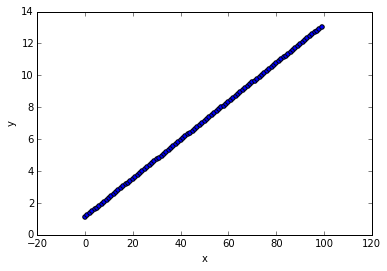

In [10]:
DataFrame({
        'x':range(100), 
        'y': [line(i) for i in range(100)]
}).plot(kind='scatter', x='x', y='y')

In [11]:
# http://code.activestate.com/recipes/578914-simple-linear-regression-with-pure-python/
def advanced_fit(X, Y):

    def mean(Xs):
        return sum(Xs) / len(Xs)
    
    m_X = mean(X)
    m_Y = mean(Y)

    def std(Xs, m):
        normalizer = len(Xs) - 1
        return math.sqrt(sum((pow(x - m, 2) for x in Xs)) / normalizer)
    # assert np.round(Series(X).std(), 6) == np.round(std(X, m_X), 6)

    def pearson_r(Xs, Ys):
    # 상관계수
        sum_xy = 0
        sum_sq_v_x = 0
        sum_sq_v_y = 0

        for (x, y) in zip(Xs, Ys):
            var_x = x - m_X
            var_y = y - m_Y
            sum_xy += var_x * var_y
            sum_sq_v_x += pow(var_x, 2)
            sum_sq_v_y += pow(var_y, 2)
            
        return sum_xy / math.sqrt(sum_sq_v_x * sum_sq_v_y)
    # assert np.round(Series(X).corr(Series(Y)), 6) == np.round(pearson_r(X, Y), 6)

    r = pearson_r(X, Y)

    b = r * (std(Y, m_Y) / std(X, m_X))
    A = m_Y - b * m_X

    def line(x):
        return b * x + A
    
    return line, b, A

In [12]:
ad_line, a, b = advanced_fit(df['x'], df['y'])

In [13]:
a,b

(-0.19230245069186136, 55.923024506918615)

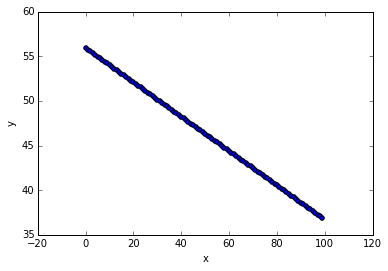

In [14]:
DataFrame({
        'x':range(100), 
        'y': [ad_line(i) for i in range(100)]
}).plot(kind='scatter', x='x', y='y')

# References
- [미분은 어떻게 코드로 구현하는가](http://stackoverflow.com/questions/9876290/how-do-i-compute-derivative-using-numpy)